In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgba2rgb

In [2]:
img = cv2.imread('rectangles.png')

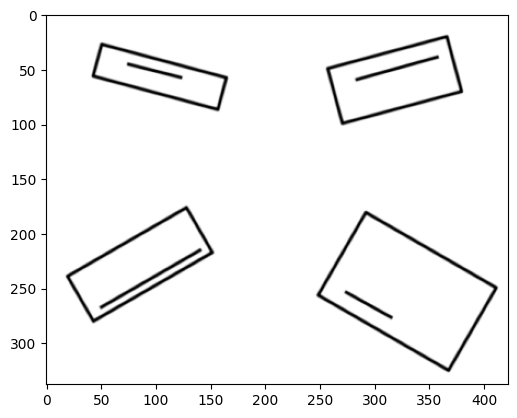

In [3]:
plt.imshow(img)
plt.show()

In [4]:
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgCan = cv2.Canny(imgGray,50,200)

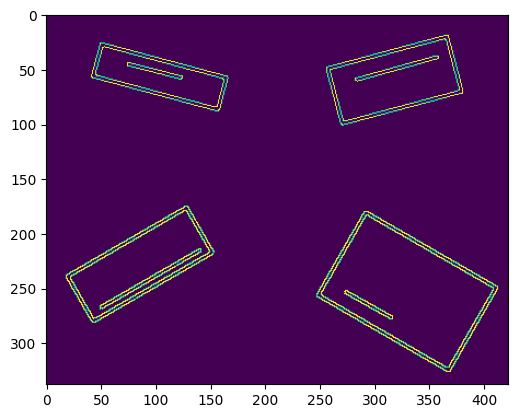

In [5]:
plt.imshow(imgCan)
plt.show()

In [6]:
blank = np.zeros_like(img)
white_bg = np.zeros((338,422,4), np.uint8)
img_list=[]
white_bg.fill(255)
img.shape

(338, 422, 3)

[247, 180, 166, 147]
[[  0.87461971   0.48480962 -25.22694278]
 [ -0.48480962   0.87461971  49.45465001]]
[18, 175, 136, 107]
[[  0.87461971  -0.48480962  34.4631746 ]
 [  0.48480962   0.87461971 -26.25920851]]
[41, 26, 126, 63]
[[ 0.97029573  0.2419219  -5.74917047]
 [-0.2419219   0.97029573 16.17676405]]
[256, 19, 125, 83]
[[  0.97029573  -0.2419219   11.89627578]
 [  0.2419219    0.97029573 -13.88739112]]


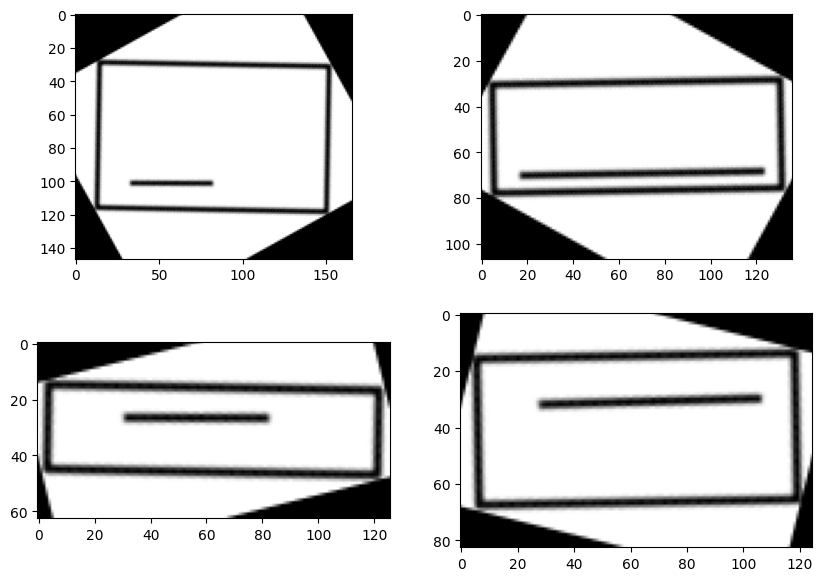

In [7]:
i=0
angles = [29,-29,14,-14]
fig = plt.figure(figsize=(10, 7))
contour, _ = cv2.findContours(imgCan, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    #cv2.rectangle(blank, (x, y), (x + w, y + h), (0,0,255), 2) 
    cropped_image = img[y:y+h, x:x+w]
    print([x,y,w,h])  
    i+=1
    fig.add_subplot(2, 2, i)
    plt.imshow(cropped_image)
    height, width = cropped_image.shape[:2]
    center = (width/2, height/2)
    rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angles[i-1], scale=1)
    print(rotate_matrix)
    rotated_image = cv2.warpAffine(src=cropped_image, M=rotate_matrix, dsize=(width, height))
    img_list.append(rotated_image)
    plt.imshow(rotated_image)

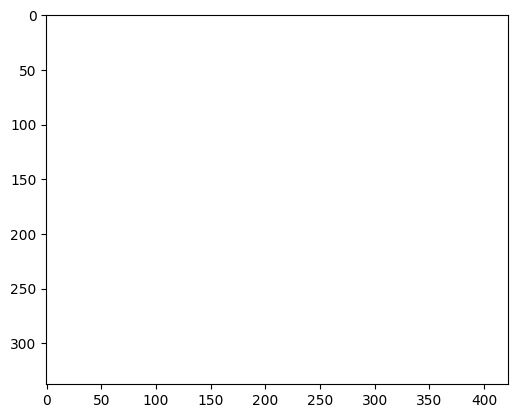

In [8]:
plt.imshow(white_bg)

In [9]:
len(img_list)

4

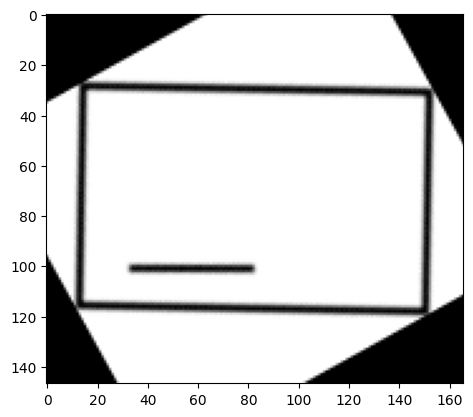

In [10]:
plt.imshow(img_list[0])

In [11]:
for i in range(len(img_list)):
    imgGray = cv2.cvtColor(img_list[i],cv2.COLOR_BGR2GRAY)
    imgCan = cv2.Canny(imgGray,50,200)
    color = [0,0,0]
    contour, _ = cv2.findContours(imgCan, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for cnt in contour:
        area = cv2.contourArea(cnt)
        print(area)
        #if area<11326:
            #cv2.drawContours(blank,cnt,-1,(255,255,255),1)       
    cv2.fillPoly(img_list[i], contour, color)

0.0
15.0
23.0
0.0
128.0
130.0
6.5
11322.5
10.0
11325.5
0.0
16.0
40.0
24.0
0.0
17.0
314.0
316.0
0.5
5439.0
5441.0
1.0
41.5
149.5
151.0
0.5
0.0
3109.0
3113.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
205.5
19.5
228.0
0.5
0.0
5375.0
1.0
5377.0
0.5
0.5


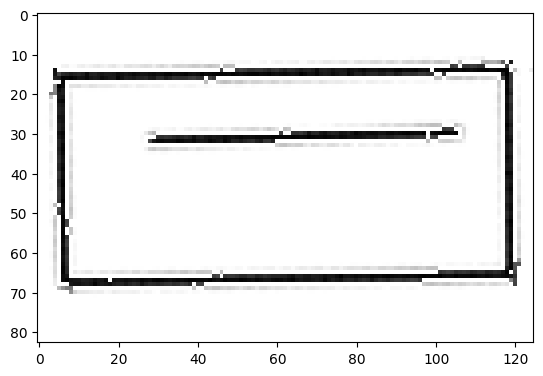

In [12]:
for i in range(len(img_list)):
    tmp = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
    b, g, r = cv2.split(img_list[i])
    rgba = [b, g, r, alpha]
    dst = cv2.merge(rgba, 4)
    dst = rgba2rgb(dst)
    img_list[i] = dst
    plt.imshow(img_list[i])

In [13]:
white_bg = rgba2rgb(white_bg)

In [14]:
white_bg[0:147,0:166] =img_list[0]
white_bg[150:257,10:146] = img_list[1]   
white_bg[10:73,200:326] = img_list[2]  
white_bg[150:233,200:325] = img_list[3]  

In [15]:
img_list[0].shape

(147, 166, 3)

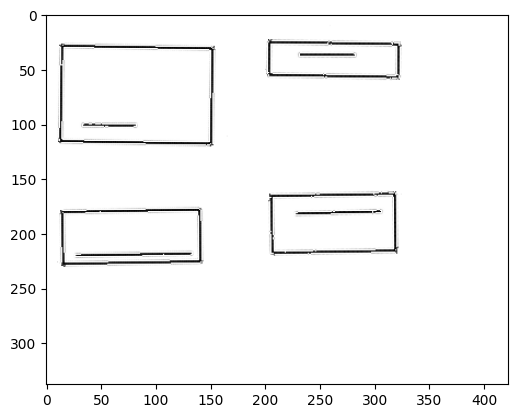

In [16]:
plt.imshow(white_bg)